# Estrazione delle classi

In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import numpy as np
import pickle

Caricamento del dataset sintetico e divisione in training e test set

In [2]:
synthetic_dataset_df = pd.read_csv('dataset/synthetic_dataset.csv') # dataset loading
synthetic_dataset_df['Number of Words'] = synthetic_dataset_df['text'].apply(lambda k: len(k.split())) # counting the number of words
random_seed = 0 # random seed for reproducibility
num_words = 7 # number of words describe the extracted classes
train, test = train_test_split(synthetic_dataset_df, test_size=0.25, random_state=random_seed, shuffle=True) # dataset splitting

In [3]:
def plot_number_of_words_histogram(data, title):
    """
    Plots a histogram of the number of words in each element of the dataset

    Parameters:
        data: DataFrame with 'Number of Words' column.
        title: Title of the histogram.

    Returns:
        None
    """
    plt.hist(data['Number of Words'], bins=50)
    plt.title(title)
    plt.xlabel('Number of Words')
    plt.ylabel('Number of Documents')
    plt.ylim(0, 160)
    plt.xlim(0, 750)
    plt.savefig("plots/" + title + '.pdf')
    plt.show()

In [4]:
# entire dataset statistics
print("Entire dataset statistics")
print(f"Number of samples: {synthetic_dataset_df.shape[0]}")
print(f"Average number of words: {synthetic_dataset_df['Number of Words'].mean()}")
print(f"Standard deviation of number of words: {synthetic_dataset_df['Number of Words'].std()}\n")
print(synthetic_dataset_df['label'].value_counts())
print("\n")
# training test set statistics
print("Training set statistics")
print(f"Number of samples: {train.shape[0]}")
print(f"Average number of words: {train['Number of Words'].mean()}")
print(f"Standard deviation of number of words: {train['Number of Words'].std()}\n")
print(train['label'].value_counts())
print("\n")
# test set statistics
print("Test set statistics")
print(f"Number of samples: {test.shape[0]}")
print(f"Average number of words: {test['Number of Words'].mean()}")
print(f"Standard deviation of number of words: {test['Number of Words'].std()}\n")
print(test['label'].value_counts().sort_index())

Entire dataset statistics
Number of samples: 2483
Average number of words: 209.1913008457511
Standard deviation of number of words: 93.24551074887194

label
0    832
2    832
1    819
Name: count, dtype: int64


Training set statistics
Number of samples: 1862
Average number of words: 208.44092373791622
Standard deviation of number of words: 92.95089214856966

label
0    630
2    616
1    616
Name: count, dtype: int64


Test set statistics
Number of samples: 621
Average number of words: 211.44122383252818
Standard deviation of number of words: 94.16287454732864

label
0    202
1    203
2    216
Name: count, dtype: int64


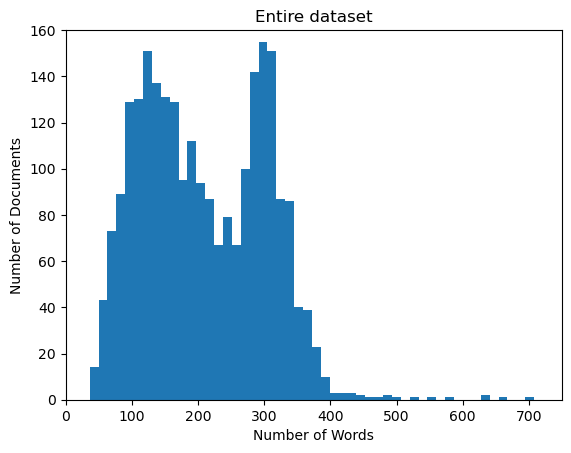

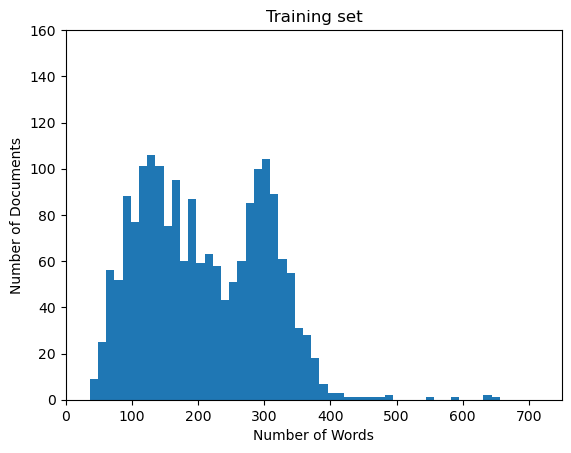

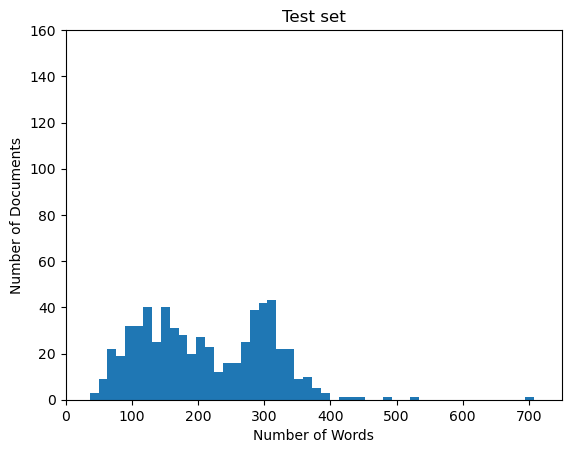

In [5]:
plot_number_of_words_histogram(synthetic_dataset_df, 'Entire dataset')
plot_number_of_words_histogram(train, 'Training set')
plot_number_of_words_histogram(test, 'Test set')

In [6]:
train.head() #visualize the first 5 rows of the training set

,label,label_name,prompt,text,Number of Words
1677,2,sci.space,Much of Cook's later exploration was privately...,Much of Cook's later exploration was privately...,299
878,1,rec.sport.hockey,It was great to hear that UMass is bringing ba...,It was great to hear that UMass is bringing ba...,94
574,0,rec.autos,Stay away from GEICO. A recent CAR DRIVER issu...,Stay away from GEICO. A recent CAR DRIVER issu...,101
712,0,rec.autos,The Bricklin was a car manufactured by a compa...,The Bricklin was a car manufactured by a compa...,319
672,0,rec.autos,"This does sound good, but I heard it tends to ...","This does sound good, but I heard it tends to ...",277


Generazione della word cloud per visualizzare i termini più frequenti

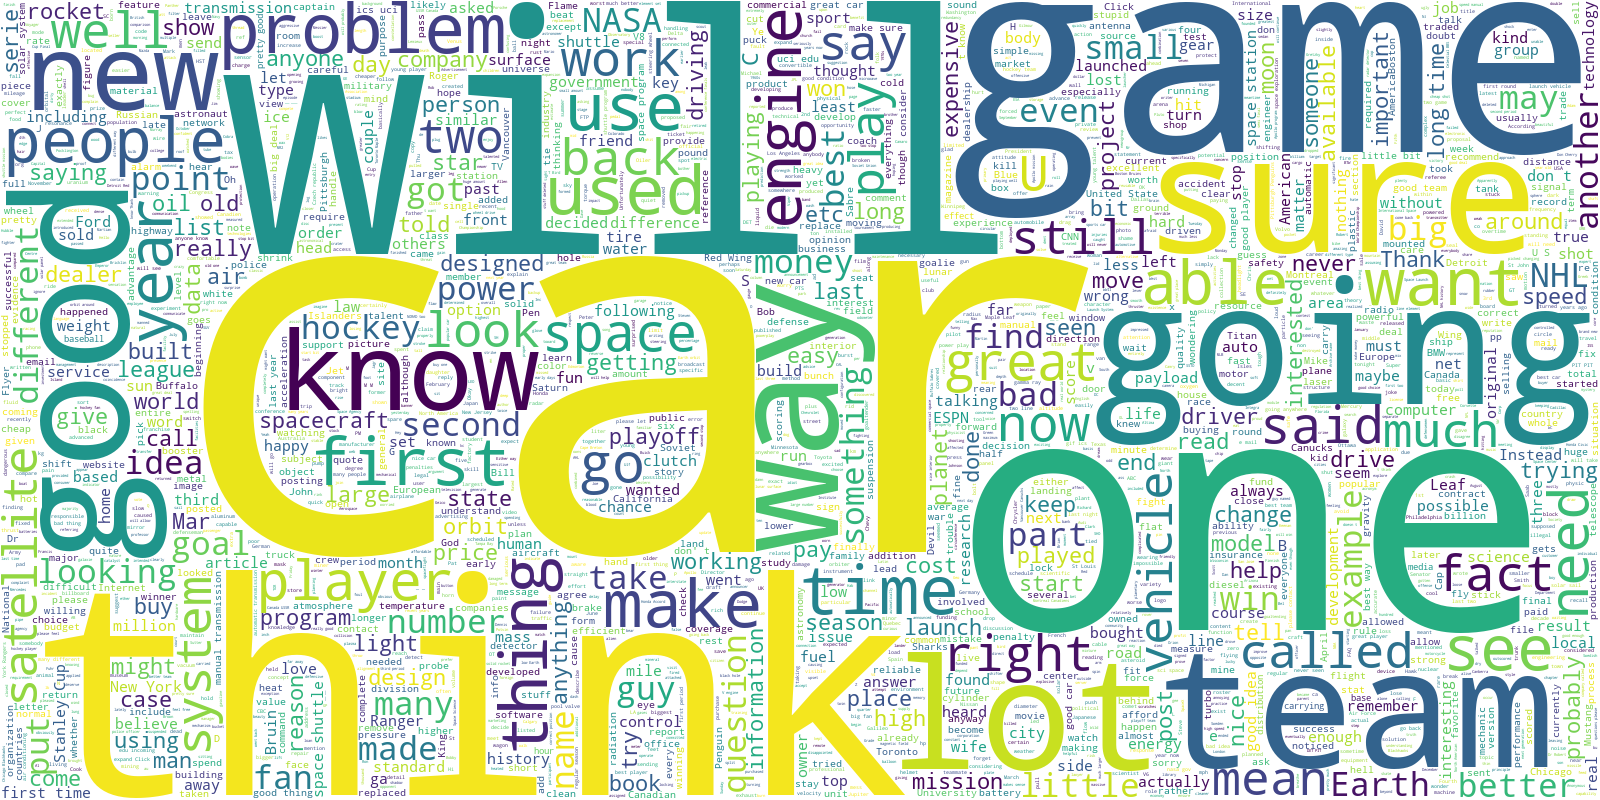

In [7]:
long_string = ','.join(list(train['text'].values)) # join all the documents in the training set into a single string
wordcloud = WordCloud(background_color="white", max_words=5000, width=1600, height=800, contour_width=3, contour_color='steelblue', random_state = 0)
wordcloud.generate(long_string)
wordcloud.to_file("plots/wordcloud.pdf")
wordcloud.to_image()

### Vettorizzazione

In [8]:
my_stop_words = list(text.ENGLISH_STOP_WORDS.union(["sure", "think", "new", "good", "know"]))
vectorizer_tf = TfidfVectorizer(stop_words=my_stop_words, # stop words list
                                lowercase=True, # convert all words to lowercase
                                max_df=0.9, # ignore words that appear in more than 90% of the documents
                                min_df=50, # ignore words that appear in less than 50 documents
                                use_idf=False, # don't use inverse document frequency reweighting
                                norm=None) # don't normalize the documents 
vectorizer_fit = vectorizer_tf.fit_transform(train['text']) # fit the vectorizer to the training set

In [9]:
print(f"Vocabulary elements: {vectorizer_tf.get_feature_names_out()}") # get the dictionary of words
print(f"Vocabulary size: {len(vectorizer_tf.get_feature_names_out())}") # get the size of the dictionary

Vocabulary elements: ['00' '000' '10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1993'
 '20' '200' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '40'
 '50' '500' '60' '93' 'ability' 'able' 'actually' 'addition' 'ago' 'air'
 'allow' 'america' 'american' 'answer' 'april' 'area' 'article' 'ask'
 'asked' 'available' 'away' 'bad' 'based' 'believe' 'best' 'better' 'big'
 'bit' 'black' 'body' 'book' 'boston' 'bought' 'bruins' 'build' 'built'
 'business' 'buy' 'called' 'came' 'canada' 'car' 'carry' 'cars' 'case'
 'center' 'chance' 'change' 'choice' 'city' 'clear' 'click' 'close'
 'coach' 'com' 'come' 'comes' 'coming' 'common' 'company' 'computer'
 'contact' 'control' 'correct' 'cost' 'couple' 'course' 'cup' 'current'
 'data' 'day' 'days' 'deal' 'dealer' 'decided' 'design' 'designed'
 'detroit' 'development' 'did' 'didn' 'difference' 'different' 'difficult'
 'does' 'doesn' 'doing' 'don' 'drive' 'driver' 'driving' 'early' 'earth'
 'easy' 'edu' 'end' 'energy' 'engine' 'engines' 

Ottimizzazione degli hyperparameter

In [10]:
search_params = {'max_iter': [100, 200, 400], 'learning_offset': [10, 20, 50], 'learning_decay': [0.6, 0.7, 0.9]}
lda = GridSearchCV(LatentDirichletAllocation(n_components=3, # number of classes
                                             learning_method='online', # LDA algorithm optimized for large datasets
                                             evaluate_every=10, 
                                             random_state=0, 
                                             perp_tol=1e-3, # minimum change in perplexity to stop training
                                             verbose = 0 # log level
                                             ),
             param_grid=search_params, # search grid
             return_train_score=True, 
             verbose=0, 
             n_jobs=-1 # use all available cores
             ) 
lda = lda.fit(vectorizer_fit)

Hyperparametr ottimali

In [ ]:
best_lda_model = lda.best_estimator_ # get the best LDA model
print("Best LDA model's hyperparameters: ", lda.best_params_) # get the best LDA model's hyperparameters
# Save the model to a file
with open('model/best_lda_model.pkl', 'wb') as file:
    pickle.dump(best_lda_model, file)


Best LDA model's hyperparameters:  {'learning_decay': 0.6, 'learning_offset': 20, 'max_iter': 400}


Ora è possibile estrarre le classi del training set. 

In [ ]:
H_train = best_lda_model.components_
print(H_train.shape)

(3, 421)


La matrice `H_train` contiene una riga per ogni classe e una colonna per ogni parola del dizionario. Il valore `H_train[i,j]` indica il numero di volte che la parola `j` è stata assegnata alla classe `i`. Quindi per ogni classe è possibile estrarre le parole più frequenti.

In [ ]:
H_train = best_lda_model.components_  # This matrix contains a row for each topic and a column for each word in the  
vocab = np.array(vectorizer_tf.get_feature_names_out()) # get the dictionary of words
top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_words-1:-1]] # function to get the top words for each topic 
topic_words = ([top_words(t) for t in H_train])
topics = [' '.join(t) for t in topic_words] # join the words into a single string
print(topics) # print the top words for each topic

['team game players hockey games play nhl', 'space earth nasa used launch shuttle orbit', 'car just don like going way engine']


L'output della cella precedente ritorna 3 liste di parole corrisponti alle 3 classi estratte dal training set. Chiaramente c'è una corrispondenza tra le classi estratte e le label del dataset sintetico. In particolare, `topics[0]` corrisponde alla Label 1 (`rec.sport.hockey`), `topics[1]` corrisponde alla Label 2 (`sci.space`) e `topic[2]` corrisponde alla Label 0 (`rec.autos`). La variabile `mapping_dict` formalizza tale corrispondenza.

In [ ]:
mapping_dict = {0: 1, 1:2, 2:0}

Definizione di una funzione che consente di comparare le predizioni del modello con le label del dataset sintetico.

In [ ]:
def evaluate_topic_model(model, vectorizer, dataframe, mapping_dict): 
    """
    Evaluates a topic model by calculating the accuracy of its predictions.

    Parameters:
        model: The trained topic model.
        vectorizer: The vectorizer used to transform the text data.
        dataframe: The dataframe containing the text data and labels.
        mapping_dict: A dictionary mapping the class index to the original label index.

    Returns:
        accuracy: The accuracy of the topic model's predictions.
    """
    W = lda.transform(vectorizer.transform(dataframe['text'])) # for each document, get the probability of belonging to each class
    predictions = np.argmax(W, axis=1) # get the class index with the highest probability
    mapping_function = np.vectorize(lambda k: mapping_dict[k])
    predictions = mapping_function(predictions) # map the class index to the original label index
    accuracy = accuracy_score(dataframe['label'], predictions) # calculate the accuracy
    return accuracy

In [ ]:
print(f"Training set accuracy: {evaluate_topic_model(best_lda_model, vectorizer_tf, train, mapping_dict)}")
print(f"Test set accuracy: {evaluate_topic_model(best_lda_model, vectorizer_tf, test, mapping_dict)}")

Training set accuracy: 0.780343716433942
Test set accuracy: 0.782608695652174
